In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

import pytz
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
from pandas_datareader import data as web

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import calendar

import itertools
import seaborn as sns
#import seaborn as sns; sns.set_theme()

import sys
sys.path.append('..')

from bcb import currency
from bcb import sgs
from pyettj import ettj
import pyettj.ettj as ettj

from operator import concat
#plt.rcParams['figure.figsize'] = (14,12)

import datetime
from datetime import datetime as date
from functools import reduce

##############################
#print("Current version of Python is ", sys.version)
import requests
from requests.auth import HTTPBasicAuth
import json

import quantstats as qs
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import update
import timeit
import time
import string
import pygsheets
from scipy import optimize

##############################

%matplotlib inline

from SWRsimulation.SWRsimulationCE_updated import SWRsimulationCE

from SWRsimulation.crra_ce_updated import crra_ce

from SWRsimulation.utils.smart_brain import get_clientes, run_single_cliente

from SWRsimulation.utils.ettj_curves import get_implicita_fwd, get_juro_real_fwd, get_last_date, update_hist_ettj, ret_taxas, update_hist_pre, get_curvas_pre, plot_curves1, plot_curves2, updated_curve_fixed_vert

from SWRsimulation.utils.tesouro import get_titulos_tesouro, get_hist_titulo, ret_acum_per, ret_acum_ano, get_taxas_ntnb

from SWRsimulation.fin_quant.port_building import build_portfolio, Portfolio, Stock, build_portfolio

from SWRsimulation.utils.data import get_prices, get_stocks, get_fx, get_indexes

from SWRsimulation.utils.quants import annualised_portfolio_quantities, df_alloc
#from SWRsimulation.fin_quant.monte_carlo import MonteCarlo, MonteCarloOpt

from SWRsimulation.utils.sb_funcs import *

#from SWRsimulation.utils.Allocation import *

from quant_system.monte_carlo.monte_carlo import MonteCarlo, MonteCarloOpt

from functools import partial
import quantstats as qs
import numpy_financial as npf
import scipy.stats as ss

import statsmodels.tsa.stattools as st

import random
import cufflinks as cf
#from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from scipy.stats import norm

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np
from scipy.optimize import minimize
import ta
from ta.volatility import BollingerBands
import pandas_datareader.data as web



pyettj 0.2.4


##### Dados
---

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)

path = "/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/base_receita_total_profs.xlsx"
path_v2 = "/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/base_receita_total_profs_v2.xlsx"
#curva_pre_.to_excel(path)
df = pd.read_excel(path)
df_v2 = pd.read_excel(path_v2)
#curva_pre_.set_index('Date', inplace=True)

##### Análise Métricas - Nº Clientes | Ticket Médio | Rec_TT 
---

In [3]:
np.sort(df.GRUPO_PLAN_OKR.unique())

array(['G_10_Mecha>200', 'G_10_Sem_Mecha', 'G_1_Mecha<=130',
       'G_1_Mecha>130', 'G_1_Sem_Mecha', 'G_2_Mecha<=130',
       'G_2_Mecha>130', 'G_2_Sem_Mecha', 'G_3_Mecha<=130',
       'G_3_Mecha>130', 'G_3_Sem_Mecha', 'G_4_Mecha<=130',
       'G_4_Sem_Mecha', 'G_5_Mecha<=130', 'G_5_Sem_Mecha',
       'G_6_Mecha<=130', 'G_6_Mecha>130', 'G_6_Sem_Mecha',
       'G_7_Mecha<=200', 'G_7_Mecha>200', 'G_7_Sem_Mecha',
       'G_8_Sem_Mecha', 'G_9_Mecha>200', 'G_9_Sem_Mecha',
       'Outros (Low or 0 LTV)'], dtype=object)

In [4]:
pd.set_option('display.max_columns', 50)

df

,Cliente,Dt_Cadastro,E-mail,0,Contato,Ult Visita tt,Prof,Ult Visita per,Pz (dc),LTV,Freq,Avg_V,Mechas,Coloração Tonalização,Tratamento Completo,Corte Feminino,Escova,Escova Baby Liss,Dt_Mecha,Ult_Vis=Dt_Mecha,DC_Mec,GRUPO_PLAN_OKR,COD,Segmento,STATUS,DATA AGENDAMENTO,SERVIÇO,PROFISSIONAL,OBS
0,Carol Mahfuz,2021-06-11,NaN,NaN,11983818365.00000,2023-04-08,Dayane Marques,2023-02-09,68,20566.30000,101.00000,203.62673,1,13,11,3,85,14,2022-04-02,False,381,G_1_Mecha>130,1,Campeões,NaN,NaN,NaN,NaN,NaN
1,Milly Drizun,2021-09-08,NaN,NaN,11981520011.00000,2023-03-31,Dayane Marques,2023-03-31,18,16478.00000,41.00000,401.90244,3,6,13,1,30,9,2023-03-31,True,18,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
2,Fernanda Canhoto,2021-06-23,NaN,NaN,11985354225.00000,2023-03-31,Dayane Marques,2023-03-31,18,14699.00000,30.00000,489.96667,2,11,7,4,20,7,2022-10-26,False,174,G_1_Mecha>130,1,Campeões,NaN,NaN,NaN,NaN,NaN
3,Ana Paula Zamper,2021-11-06,zamperana@gmail.com,NaN,11961999966.00000,2023-03-30,Dayane Marques,2023-03-30,19,14655.00000,18.00000,814.16667,4,8,9,4,8,3,2023-03-30,True,19,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
4,Luciana Kos,2021-06-28,lcpaganini@hotmail.com,NaN,11996888960.00000,2023-04-05,Dayane Marques,2023-04-05,13,11697.00000,25.00000,467.88000,3,11,0,5,3,0,2022-12-23,False,116,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Virginia gomes,2023-01-07,NaN,NaN,31987469513.00000,2023-01-07,Bruno Matos de Oliveira,2023-01-07,101,166.00000,1.00000,166.00000,0,0,0,0,1,0,NaT,False,0,G_6_Sem_Mecha,6,Clientes precisando de atenção,NaN,NaN,NaN,NaN,NaN
882,Virginia Piury Arza,2022-04-08,NaN,NaN,11963091473.00000,2023-02-17,Bruno Matos de Oliveira,2023-02-17,60,4022.00000,9.00000,446.88889,1,5,0,1,0,2,2022-04-09,False,374,G_2_Mecha>130,2,Fiéis,NaN,NaN,NaN,NaN,NaN
883,Vivian Calabria Macarrão,2022-04-19,vivianmacarrao@hotmail.com,NaN,11991951177.00000,2022-04-22,Bruno Matos de Oliveira,2022-04-22,361,243.00000,1.00000,243.00000,0,0,0,1,0,0,NaT,False,0,G_9_Sem_Mecha,9,Hibernando,NaN,NaN,NaN,NaN,NaN
884,Vivian Carvalho,2022-08-25,v.carvalho@btp.com.br,NaN,13996271608.00000,2022-08-26,Bruno Matos de Oliveira,2022-08-26,235,140.00000,1.00000,140.00000,0,0,0,0,1,0,NaT,False,0,G_10_Sem_Mecha,10,Perdidos,NaN,NaN,NaN,NaN,NaN


In [5]:
df_filter = df.drop_duplicates(subset='Cliente', keep="first")
df_filter


,Cliente,Dt_Cadastro,E-mail,0,Contato,Ult Visita tt,Prof,Ult Visita per,Pz (dc),LTV,Freq,Avg_V,Mechas,Coloração Tonalização,Tratamento Completo,Corte Feminino,Escova,Escova Baby Liss,Dt_Mecha,Ult_Vis=Dt_Mecha,DC_Mec,GRUPO_PLAN_OKR,COD,Segmento,STATUS,DATA AGENDAMENTO,SERVIÇO,PROFISSIONAL,OBS
0,Carol Mahfuz,2021-06-11,NaN,NaN,11983818365.00000,2023-04-08,Dayane Marques,2023-02-09,68,20566.30000,101.00000,203.62673,1,13,11,3,85,14,2022-04-02,False,381,G_1_Mecha>130,1,Campeões,NaN,NaN,NaN,NaN,NaN
1,Milly Drizun,2021-09-08,NaN,NaN,11981520011.00000,2023-03-31,Dayane Marques,2023-03-31,18,16478.00000,41.00000,401.90244,3,6,13,1,30,9,2023-03-31,True,18,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
2,Fernanda Canhoto,2021-06-23,NaN,NaN,11985354225.00000,2023-03-31,Dayane Marques,2023-03-31,18,14699.00000,30.00000,489.96667,2,11,7,4,20,7,2022-10-26,False,174,G_1_Mecha>130,1,Campeões,NaN,NaN,NaN,NaN,NaN
3,Ana Paula Zamper,2021-11-06,zamperana@gmail.com,NaN,11961999966.00000,2023-03-30,Dayane Marques,2023-03-30,19,14655.00000,18.00000,814.16667,4,8,9,4,8,3,2023-03-30,True,19,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
4,Luciana Kos,2021-06-28,lcpaganini@hotmail.com,NaN,11996888960.00000,2023-04-05,Dayane Marques,2023-04-05,13,11697.00000,25.00000,467.88000,3,11,0,5,3,0,2022-12-23,False,116,G_1_Mecha<=130,1,Campeões,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Virginia gomes,2023-01-07,NaN,NaN,31987469513.00000,2023-01-07,Bruno Matos de Oliveira,2023-01-07,101,166.00000,1.00000,166.00000,0,0,0,0,1,0,NaT,False,0,G_6_Sem_Mecha,6,Clientes precisando de atenção,NaN,NaN,NaN,NaN,NaN
882,Virginia Piury Arza,2022-04-08,NaN,NaN,11963091473.00000,2023-02-17,Bruno Matos de Oliveira,2023-02-17,60,4022.00000,9.00000,446.88889,1,5,0,1,0,2,2022-04-09,False,374,G_2_Mecha>130,2,Fiéis,NaN,NaN,NaN,NaN,NaN
883,Vivian Calabria Macarrão,2022-04-19,vivianmacarrao@hotmail.com,NaN,11991951177.00000,2022-04-22,Bruno Matos de Oliveira,2022-04-22,361,243.00000,1.00000,243.00000,0,0,0,1,0,0,NaT,False,0,G_9_Sem_Mecha,9,Hibernando,NaN,NaN,NaN,NaN,NaN
884,Vivian Carvalho,2022-08-25,v.carvalho@btp.com.br,NaN,13996271608.00000,2022-08-26,Bruno Matos de Oliveira,2022-08-26,235,140.00000,1.00000,140.00000,0,0,0,0,1,0,NaT,False,0,G_10_Sem_Mecha,10,Perdidos,NaN,NaN,NaN,NaN,NaN


In [33]:
#df[~df['Cliente'].isin(df_filter['Cliente'])]

#df_filter[~df_filter['Cliente'].isin(df['Cliente'])]

In [6]:
df_x1 = (df.groupby(by=['Prof'])['Freq'].describe()).T
df_x1

Prof,Bruno Matos de Oliveira,Dayane Marques,Leonardo Moraes Mondini,Micael Ademir Nunes,Yago Almeida Rodrigues,Yuri Silva Ramos
count,285.00000,251.00000,88.00000,128.00000,48.00000,86.00000
mean,2.86316,5.40239,2.56818,2.31250,3.06250,4.33721
std,4.25245,8.93227,2.26312,2.65244,3.25776,11.06623
min,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
50%,1.00000,3.00000,1.00000,1.00000,2.00000,2.00000
75%,3.00000,6.00000,3.25000,2.00000,4.00000,4.00000
max,38.00000,101.00000,10.00000,18.00000,18.00000,101.00000


Prof,Bruno Matos de Oliveira,Dayane Marques,Leonardo Moraes Mondini,Micael Ademir Nunes,Yago Almeida Rodrigues,Yuri Silva Ramos
count,285.00000,251.00000,88.00000,128.00000,48.00000,86.00000
mean,752.67368,2495.80243,1467.26920,825.67969,1204.22917,2234.95698
std,1201.13883,3194.58564,2220.71741,1401.50768,1260.96235,3243.06027
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,160.00000,386.00000,146.50000,194.50000,680.00000,355.00000
50%,290.00000,1382.00000,675.00000,447.00000,980.00000,1165.00000
75%,880.00000,2986.00000,1685.00000,942.50000,1330.00000,2767.50000
max,7574.00000,20566.30000,10805.00000,10805.00000,7574.00000,20566.30000


Prof,Bruno Matos de Oliveira,Dayane Marques,Leonardo Moraes Mondini,Micael Ademir Nunes,Yago Almeida Rodrigues,Yuri Silva Ramos
count,285.00000,251.00000,88.00000,128.00000,48.00000,86.00000
mean,276.49537,518.19312,536.29859,362.91562,575.73530,633.05487
std,243.54806,390.92119,500.99363,323.68764,387.78212,448.66928
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,120.00000,250.00000,122.50000,150.00000,324.00000,270.00000
50%,225.50000,400.00000,422.50000,244.66667,530.00000,608.75000
75%,334.00000,748.18182,846.25000,450.00000,835.00000,905.83333
max,1450.00000,2000.00000,2050.00000,1330.00000,1360.00000,2050.00000


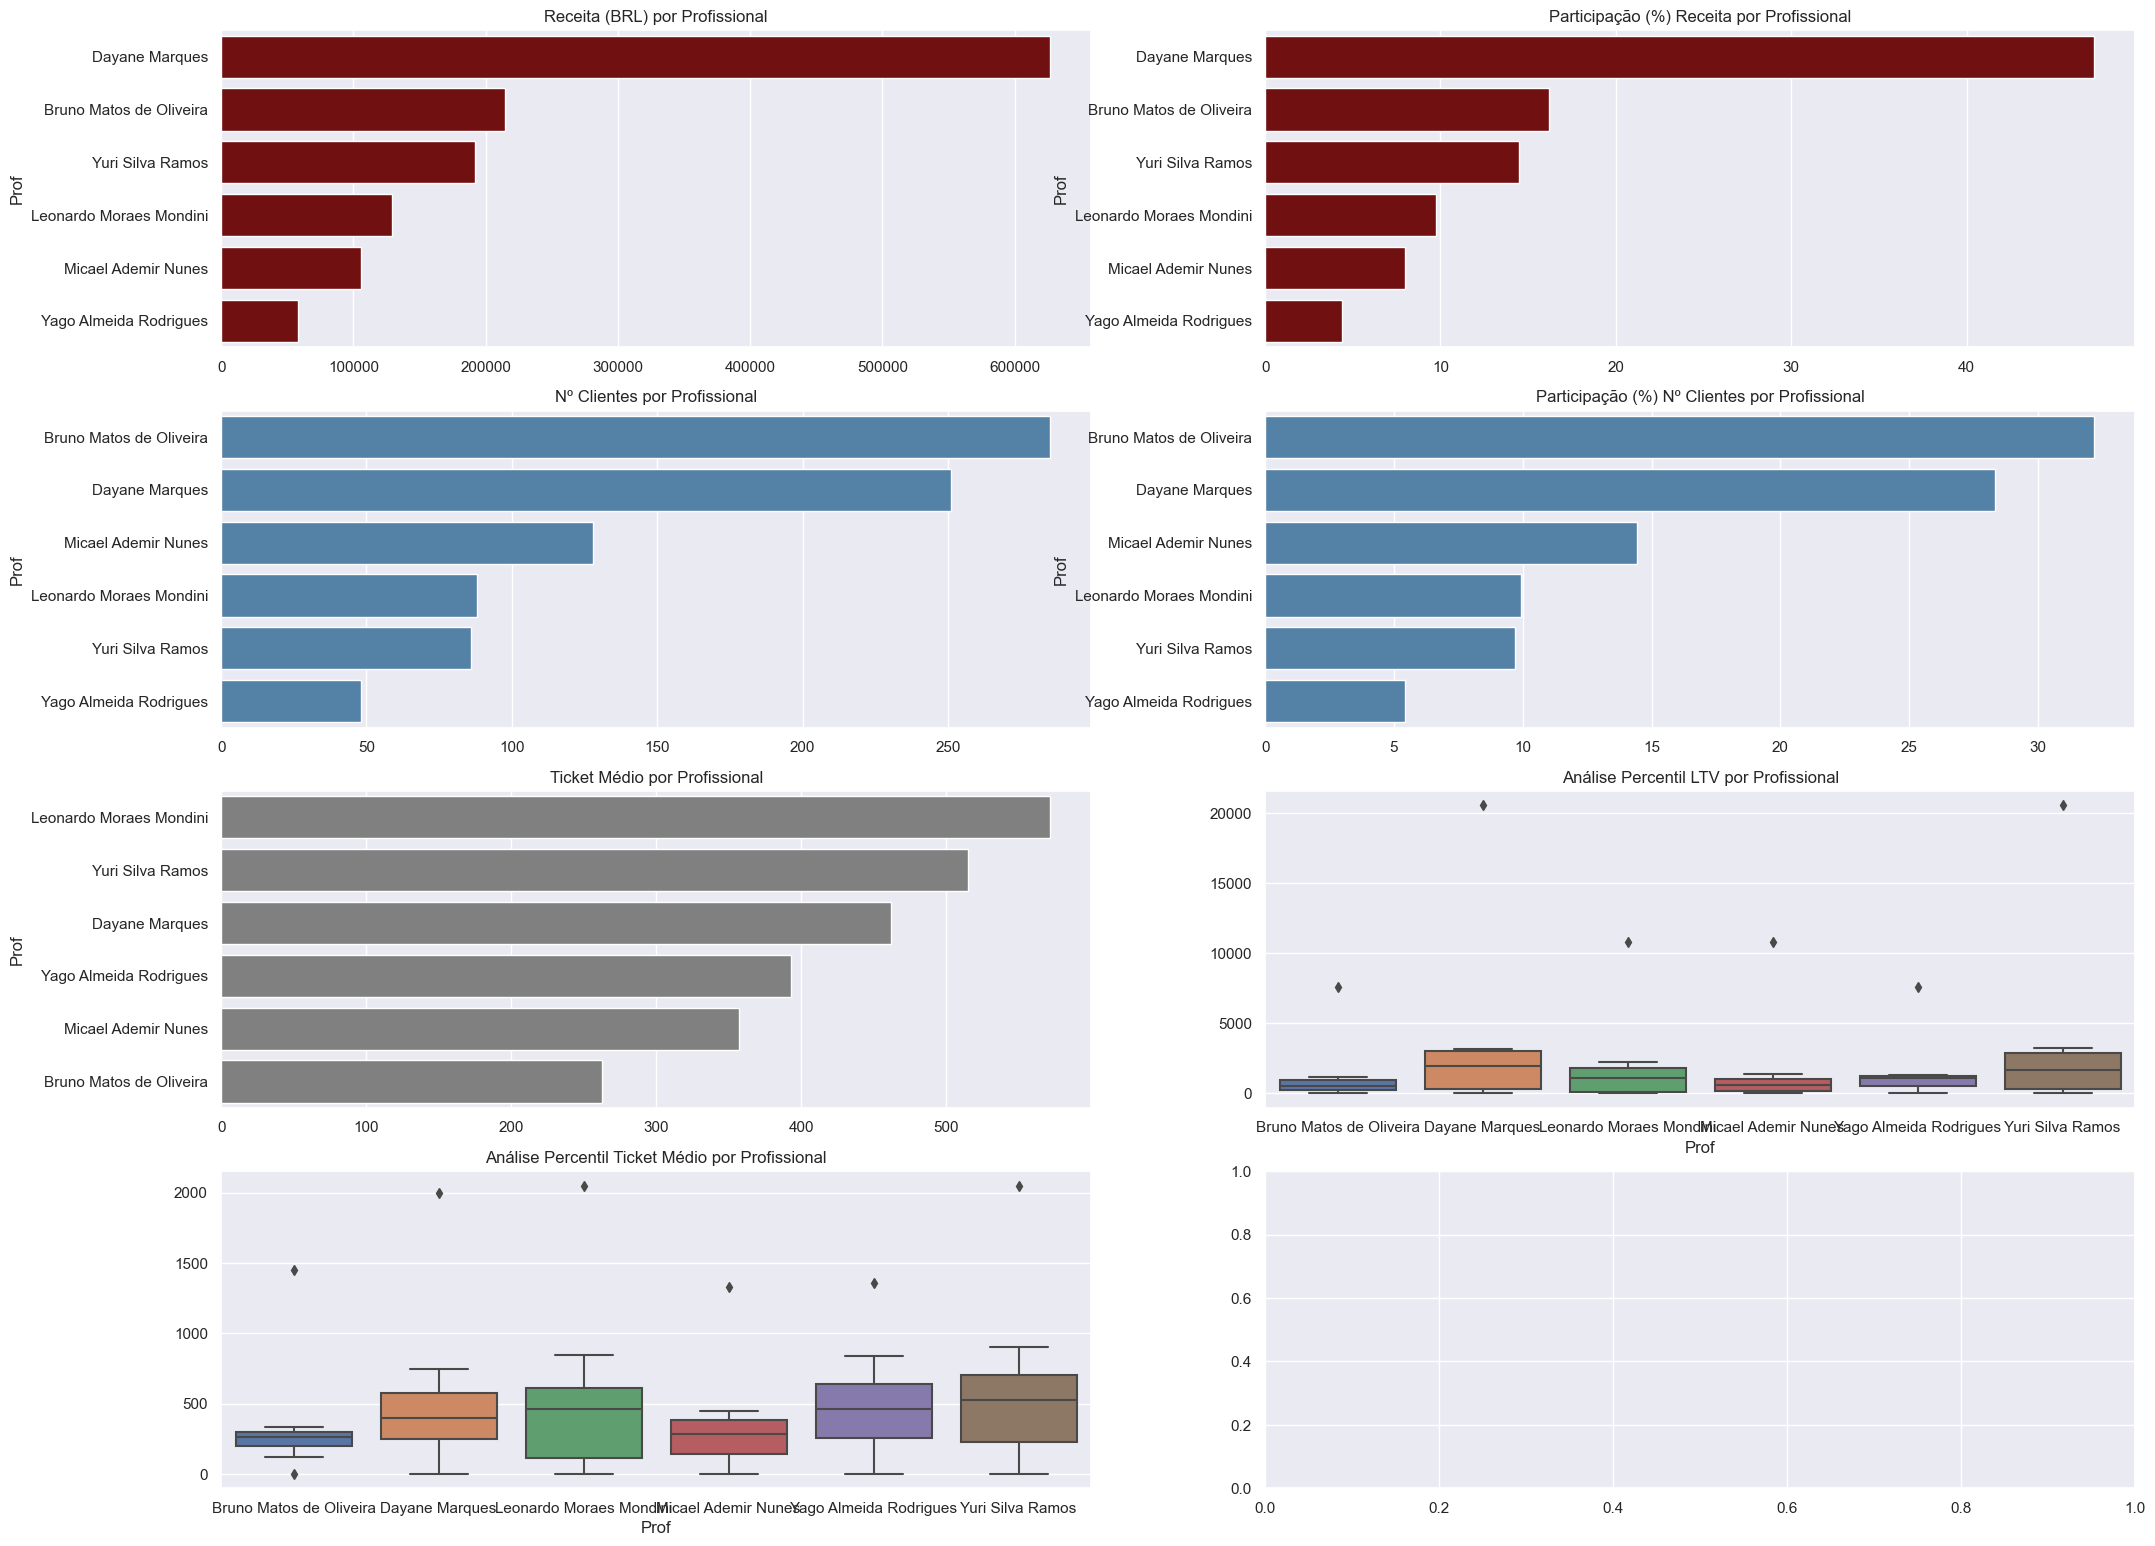

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(22,18))

df4 = pd.DataFrame(df.groupby(by=['Prof'])['LTV'].sum()).sort_values(by='LTV', ascending=False)
ax = sns.barplot(x=df4.values.flatten(), y=df4.index , color ='maroon',ax=axs[0,0])
ax.set_title("Receita (BRL) por Profissional")

df3 = pd.DataFrame((df.groupby(by=['Prof'])['LTV'].sum() / df.LTV.sum()) * 100).sort_values(by='LTV', ascending=False)
ax = sns.barplot(x=df3.values.flatten(), y=df3.index, color ='maroon', ax=axs[0,1])
ax.set_title("Participação (%) Receita por Profissional")

df2 = pd.DataFrame(df.groupby(by=['Prof'])['Cliente'].count()).sort_values(by='Cliente', ascending=False)
ax = sns.barplot(x=df2.values.flatten(), y=df2.index,color='steelblue', ax=axs[1,0])
ax.set_title("Nº Clientes por Profissional")

df1 = pd.DataFrame((df.groupby(by=['Prof'])['Cliente'].count() / df.Cliente.count()) * 100).sort_values(by='Cliente', ascending=False)
ax = sns.barplot(x=df1.values.flatten(), y=df1.index,color='steelblue', ax=axs[1,1])
ax.set_title("Participação (%) Nº Clientes por Profissional")


df5 = pd.DataFrame(df.groupby(by=['Prof'])['LTV'].sum() / df.groupby(by=['Prof'])['Freq'].sum()).sort_values(by=0, ascending=False)
ax = sns.barplot(x=df5.values.flatten(), y=df5.index,color='gray', ax=axs[2,0])
ax.set_title("Ticket Médio por Profissional")

df_x = (df.groupby(by=['Prof'])['LTV'].describe()).T
ax = sns.boxplot(data=df_x, ax=axs[2,1])
ax.set_title("Análise Percentil LTV por Profissional")

df_x1 = (df.groupby(by=['Prof'])['Avg_V'].describe()).T
ax = sns.boxplot(data=df_x1, ax=axs[3,0])
ax.set_title("Análise Percentil Ticket Médio por Profissional")




display(df_x)
display(df_x1)

##### Análise Evolução Receita e Serviços
----

In [234]:
np.sort(df_v2.Serviço.unique())

array(['AMPOLA BRAE', 'Alinhamento', 'Alinhamento Contorno',
       'Alinhamento Masculino', 'Ampola Kerastase', 'Avaliação',
       'Baby Liss', 'Coloração Fio a Fio', 'Coloração Pessoal',
       'Coloração Tonalização', 'Coloração de Raiz', 'Comanda Cortesia',
       'Correção de cor', 'Corte Bordado', 'Corte Feminino',
       'Corte Franja', 'Corte Infantil', 'Corte Masculino', 'Cortesia',
       'Escova', 'Escova Baby Liss', 'Escova do Mega', 'Hidratação',
       'Hidratação (Mask)', 'Hidratação Infusion', 'High Liss',
       'Manutenção de Mega', 'Mecha Meia Cabeça', 'Mechas',
       'Mechas Inversas', 'Mega Hair (Colocação)', 'Mega Hair - Cabelo',
       'Penteado', 'RETORNO', 'Retirada de Mega Hair', 'Secagem',
       'Shampoo Lavatório', 'Teste de Mecha', 'Teste de noiva penteado',
       'Trat Kerastase (Completo)', 'Tratamento Braé',
       'Tratamento Completo', 'Tratamento Keune'], dtype=object)

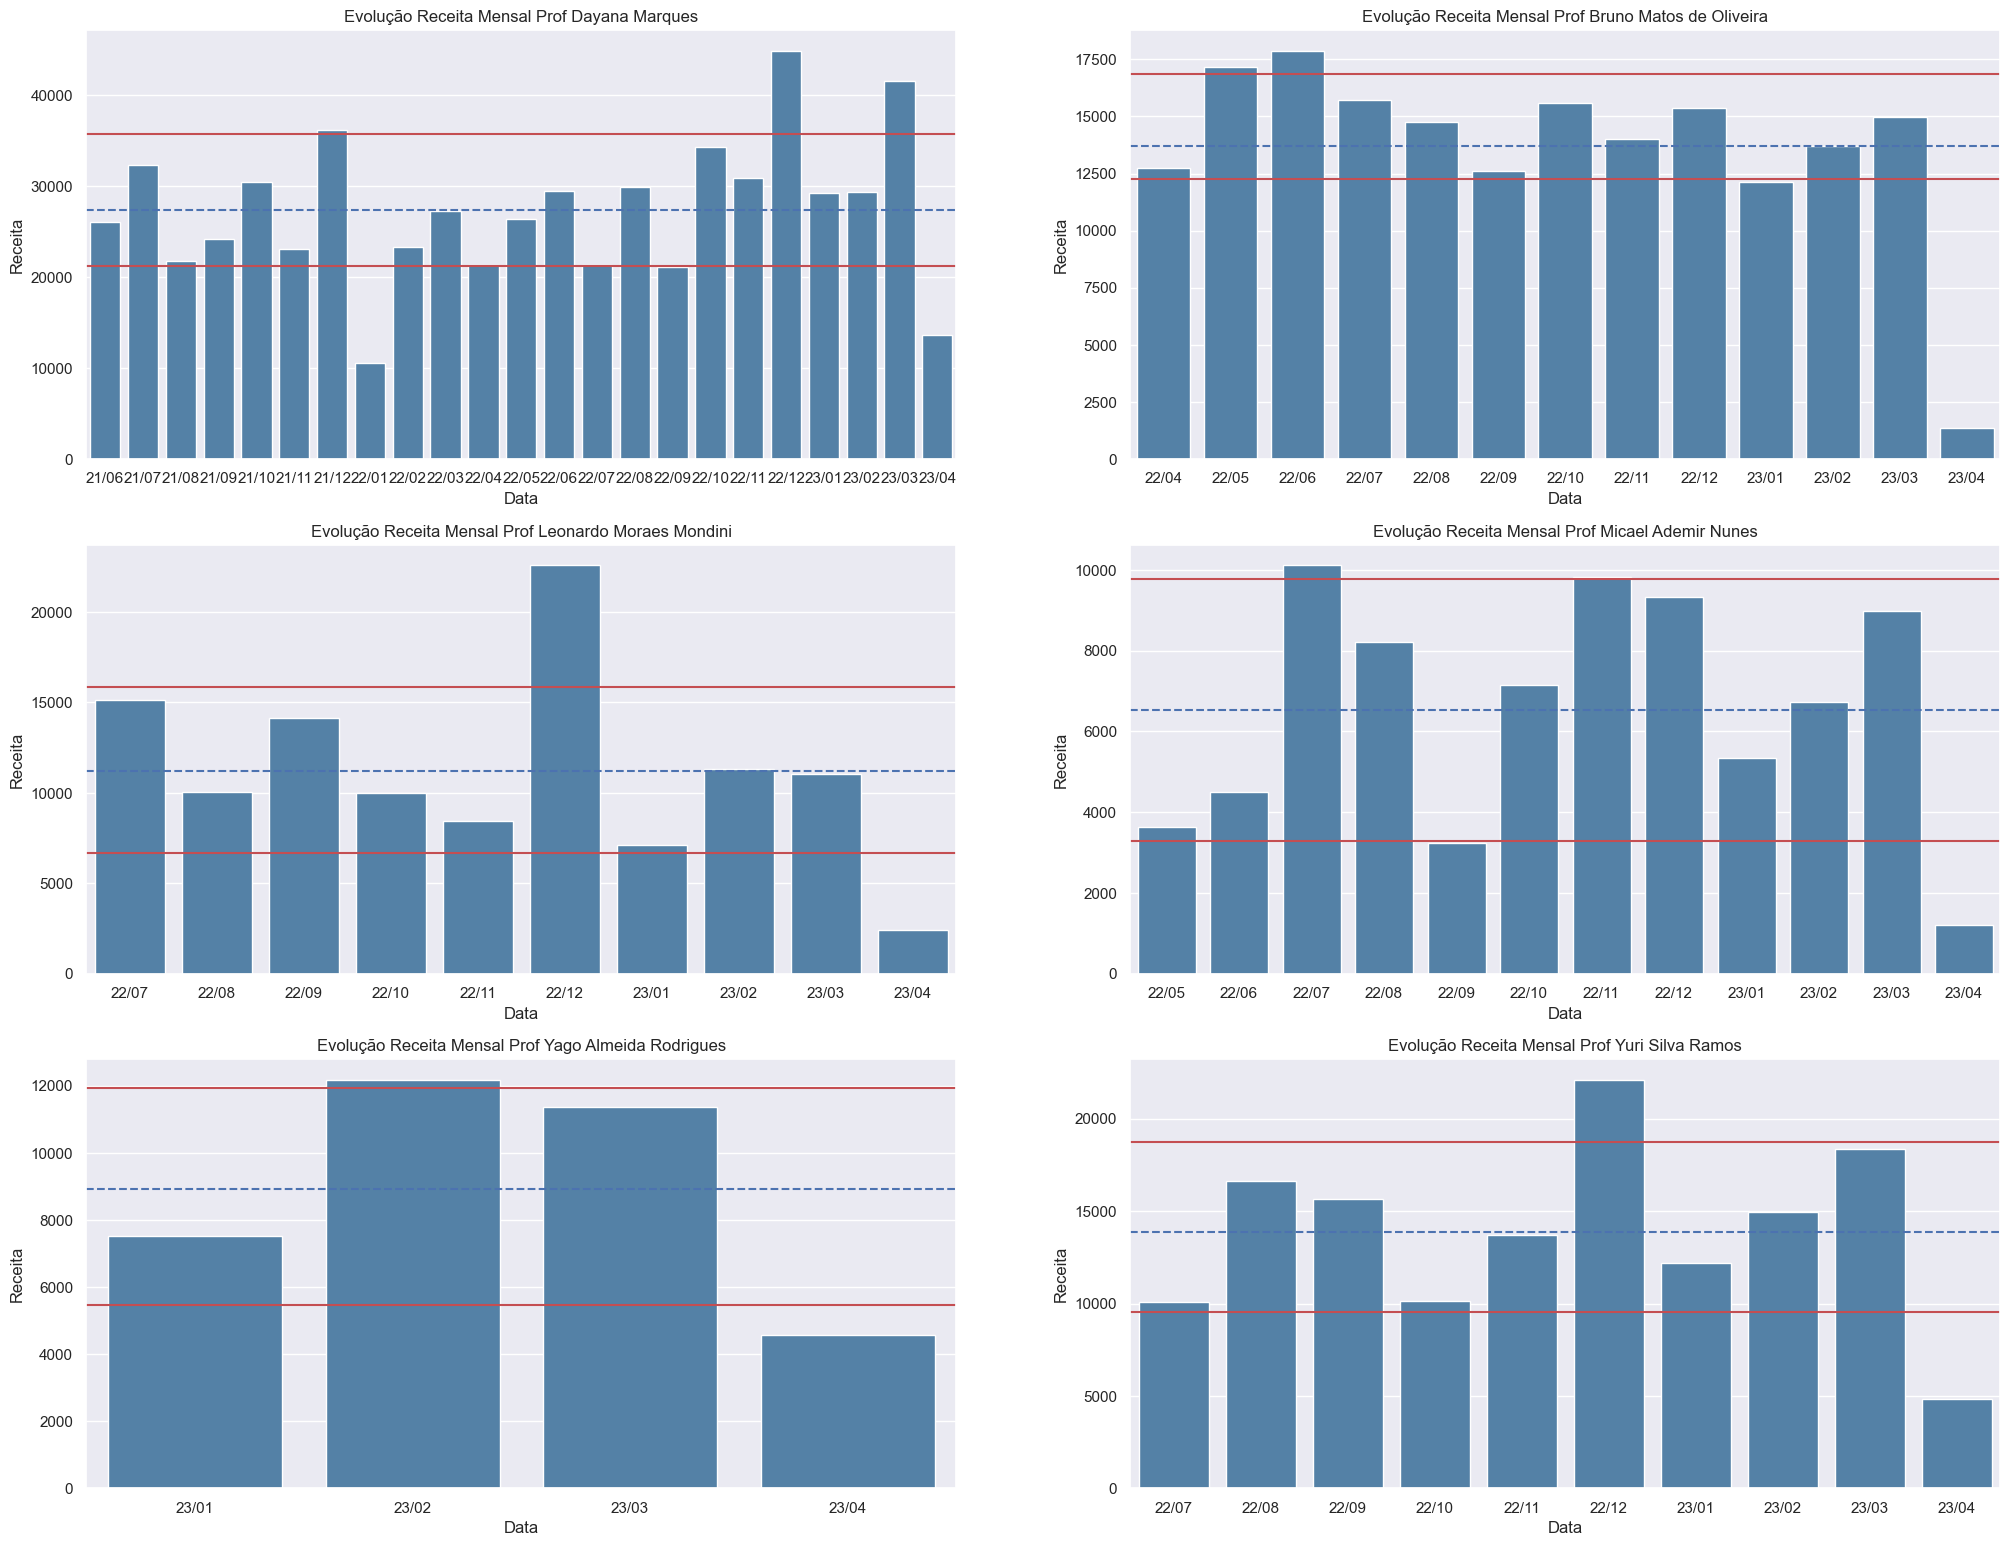

In [204]:
fig, axs = plt.subplots(3, 2, figsize=(22,18))


a = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[0]].set_index('Data').resample('M').sum()
a.index = a.index.strftime('%y/%m')
ax = sns.barplot(x=a.index, y=a.Receita , color ='steelblue', ax=axs[0,0])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[0]}')
ax.axhline(a.Receita.mean(), ls='--')
ax.axhline(np.quantile(a.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(a.Receita.dropna(), 0.1), color='r')

b = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[1]].set_index('Data').resample('M').sum()
b.index = b.index.strftime('%y/%m')
ax = sns.barplot(x=b.index, y=b.Receita , color ='steelblue', ax=axs[0,1])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[1]}')
ax.axhline(b.Receita.mean(), ls='--')
ax.axhline(np.quantile(b.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(b.Receita.dropna(), 0.1), color='r')

c = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[2]].set_index('Data').resample('M').sum()
c.index = c.index.strftime('%y/%m')
ax = sns.barplot(x=c.index, y=c.Receita , color ='steelblue', ax=axs[1,0])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[2]}')
ax.axhline(c.Receita.mean(), ls='--')
ax.axhline(np.quantile(c.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(c.Receita.dropna(), 0.1), color='r')

d = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[3]].set_index('Data').resample('M').sum()
d.index = d.index.strftime('%y/%m')
ax = sns.barplot(x=d.index, y=d.Receita , color ='steelblue', ax=axs[1,1])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[3]}')
ax.axhline(d.Receita.mean(), ls='--')
ax.axhline(np.quantile(d.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(d.Receita.dropna(), 0.1), color='r')

e = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[4]].set_index('Data').resample('M').sum()
e.index = e.index.strftime('%y/%m')
ax = sns.barplot(x=e.index, y=e.Receita , color ='steelblue', ax=axs[2,0])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[4]}')
ax.axhline(e.Receita.mean(), ls='--')
ax.axhline(np.quantile(e.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(e.Receita.dropna(), 0.1), color='r')

f = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[5]].set_index('Data').resample('M').sum()
f.index = f.index.strftime('%y/%m')
ax = sns.barplot(x=f.index, y=f.Receita , color ='steelblue', ax=axs[2,1])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[5]}')
ax.axhline(f.Receita.mean(), ls='--')
ax.axhline(np.quantile(f.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(f.Receita.dropna(), 0.1), color='r')


In [ ]:
df_v2.Serviço.unique()

In [241]:
df_v2

,Profissional,Data,Número Comanda,Serviço,Categoria,Cliente,Qtd.,Valor,Receita
0,Dayana Marques,2021-06-08,116,Coloração Tonalização,Cabelo,Elaine Cataldi,1,160.00000,160.00000
1,Dayana Marques,2021-06-08,116,Mega Hair (Colocação),Cabelo,Elaine Cataldi,1,400.00000,400.00000
2,Dayana Marques,2021-06-08,119,Coloração Tonalização,Cabelo,Elaine Pareto,1,300.00000,300.00000
3,Dayana Marques,2021-06-08,119,Mechas,Cabelo,Elaine Pareto,1,600.00000,600.00000
4,Dayana Marques,2021-06-08,161,Coloração Tonalização,Cabelo,Helena Mesquita,1,300.00000,300.00000
...,...,...,...,...,...,...,...,...,...
4885,Yuri Silva Ramos,2023-04-06,64,Coloração de Raiz,Cabelo,Danielle Lourenço Galvão,1,270.00000,270.00000
4886,Yuri Silva Ramos,2023-04-06,64,Hidratação (Mask),Cabelo,Danielle Lourenço Galvão,1,150.00000,150.00000
4887,Yuri Silva Ramos,2023-04-08,72,Mechas,Cabelo,Andressa Dayan,1,1280.00000,1280.00000
4888,Yuri Silva Ramos,2023-04-11,82,Comanda Cortesia,Cabelo,Gabriela Galhado Massa,1,15.00000,15.00000


In [ ]:
.sort_values(by='LTV', ascending=False)

In [ ]:
df4 = pd.DataFrame(df_v2.groupby(by=['Profissional', 'Serviço'])['Receita'].sum())
df4


In [ ]:
df4.index.get_level_values('Profissional')

In [ ]:
ax = sns.barplot(x=df4.index.get_level_values('Profissional'), y=df4.Receita , color ='steelblue')


In [ ]:
#Ordenar receita por serviços por prof -> 80/20

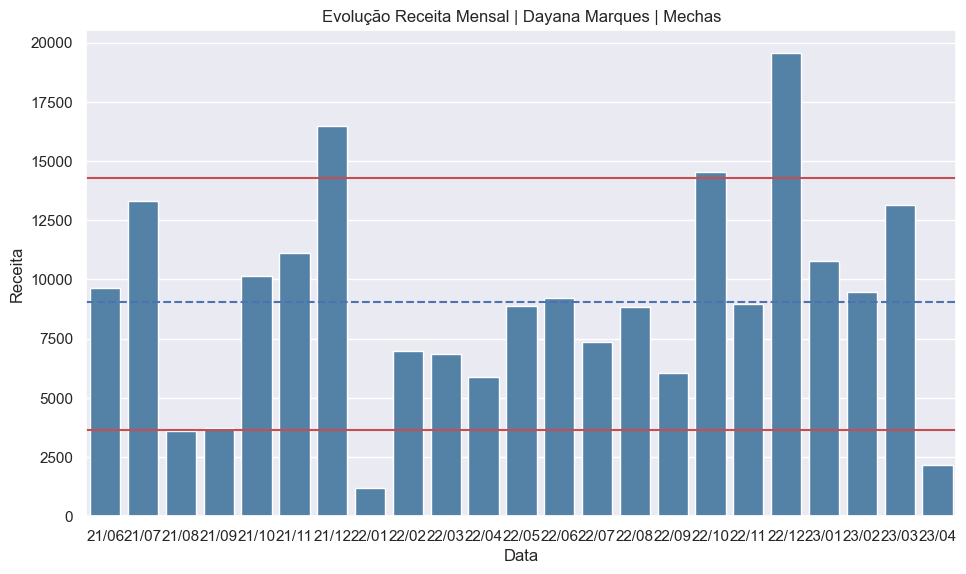

In [261]:
#Rceita Mensal por Prof e por Serviço

Serv = 'Mechas'

df_in = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[0]]
df_out = df_in[df_in.Serviço == Serv].set_index('Data').resample('M').sum()
df_out.index = df_out.index.strftime('%y/%m')

ax = sns.barplot(x=df_out.index, y=df_out.Receita , color ='steelblue')
ax.set_title(f'Evolução Receita Mensal | {df_v2.Profissional.unique()[0]} | {Serv}')
ax.axhline(df_out.Receita.mean(), ls='--')
ax.axhline(np.quantile(df_out.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(df_out.Receita.dropna(), 0.1), color='r')


In [ ]:
a = df_v2[df_v2.Profissional == df_v2.Profissional.unique()[0]].set_index('Data').resample('M').sum()
a.index = a.index.strftime('%y/%m')
ax = sns.barplot(x=a.index, y=a.Receita , color ='steelblue', ax=axs[0,0])
ax.set_title(f'Evolução Receita Mensal Prof {df_v2.Profissional.unique()[0]}')
ax.axhline(a.Receita.mean(), ls='--')
ax.axhline(np.quantile(a.Receita.dropna(), 0.9), color='r')
ax.axhline(np.quantile(a.Receita.dropna(), 0.1), color='r')

##### Elaborar estratégias e Gerar tabelas para abordagem direta com clientes (por ordem de prioridade)
---

In [88]:
today = date.today().strftime('%Y-%m-%d')


In [57]:
#FILTRAR POR GRUPO DE CLIENTE E POR PROF -> COM E SEM MECHA

Cod = 7

for p in range(len(df.Prof.unique())):

    df_out = df[df.COD == Cod][df[df.COD == Cod].Prof == df[df.COD == Cod].Prof.unique()[p]]  #--> variar o prof
    df_sem_mec = df_out[df_out.GRUPO_PLAN_OKR.values == f'G_{Cod}_Sem_Mecha'].sort_values(by='LTV', ascending=False)
    df_com_mec = df_out[df_out.GRUPO_PLAN_OKR.values != f'G_{Cod}_Sem_Mecha'].sort_values(by='LTV', ascending=False)

    path_1 = f"/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/df_hist_profs/Grupos_Profs/{df.Prof.unique()[p]}_Sem_Mecha_Grupo_{Cod}_{today}.xlsx"
    path_2 = f"/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/df_hist_profs/Grupos_Profs/{df.Prof.unique()[p]}_Com_Mecha_Grupo_{Cod}_{today}.xlsx"

    df_sem_mec.to_excel(path_1)
    df_com_mec.to_excel(path_2)

In [94]:
#FILTRAR POR GRUPO DE CLIENTE -> PARA CADA GRUPO --> TODOS OS PROFS

for c in range(len(df.COD.unique())):

    df_out = df[df.COD == c]
    #df_sem_mec = df_out[df_out.GRUPO_PLAN_OKR.values == f'G_{c}_Sem_Mecha'].sort_values(by='LTV', ascending=False)
    #df_com_mec = df_out[df_out.GRUPO_PLAN_OKR.values != f'G_{c}_Sem_Mecha'].sort_values(by='LTV', ascending=False)

    #path_1 = f"/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/df_hist_profs/Grupos_todos_os_profs/Sem_Mecha_Grupo_{c}_{today}.xlsx"
    path_2 = f"/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/df_hist_profs/Grupos_todos_os_profs/Grupo_{c}_{today}.xlsx"

#    df_sem_mec.to_excel(path_1)
    df_out.to_excel(path_2)

In [69]:
#FILTRAR POR PROF -> PARA CADA PROF --> TODOS OS GRUPOS DE CLIENTE

for p in range(len(df.Prof.unique())):

    df_out = df[df.Prof == df.Prof.unique()[p]]    
    path = f"/Users/Dell/OneDrive//Área de Trabalho/User02/DESKTOP/D. ONE/Mkt & Sales/df_hist_profs/Profs_todos_os_grupos/{df.Prof.unique()[p]}_{today}.xlsx"

    df_out.to_excel(path)

##### TESTES

In [91]:

for c in range(len(df.COD.unique())):
    df_out = df[df.COD == c]
    #print(len(df_out))
    print(f"{df_out.Segmento.values[0]}______Grupo_{c}_______________{len(df_out)}")


Outros (Low or 0 LTV)______Grupo_0_______________41
Campeões______Grupo_1_______________40
Fiéis______Grupo_2_______________104
FIéis em potencial______Grupo_3_______________85
Novos Clientes______Grupo_4_______________73
Promessas______Grupo_5_______________35
Clientes precisando de atenção______Grupo_6_______________120
Em risco_High_LTV______Grupo_7_______________126
Em risco_Low_LTV______Grupo_8_______________6
Hibernando______Grupo_9_______________158
Perdidos______Grupo_10_______________98


<AxesSubplot: ylabel='Segmento do cliente'>

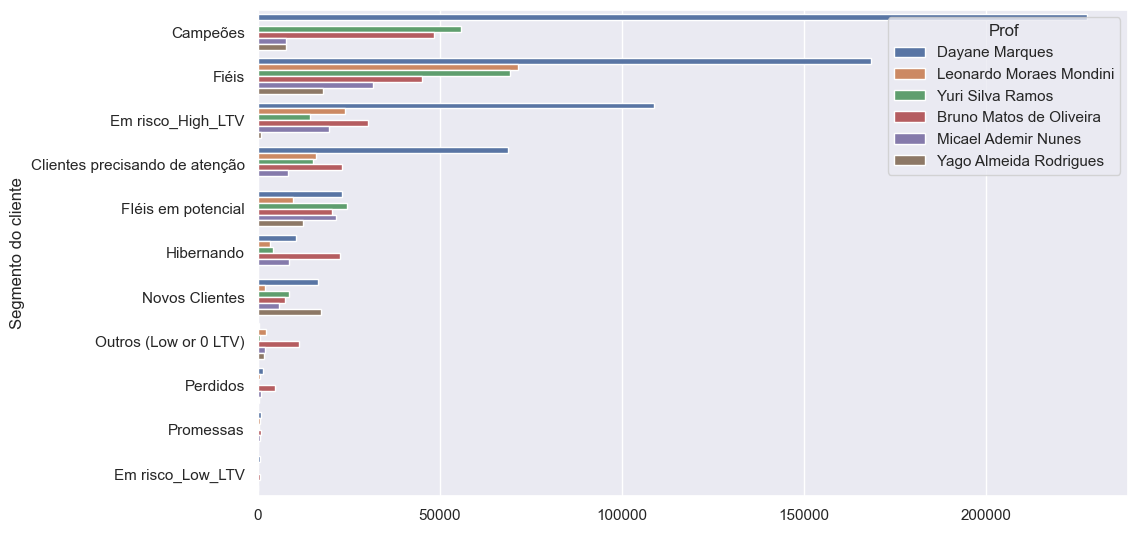

In [82]:
fig, axs = plt.subplots(figsize=(10,6))

df4 = pd.DataFrame(df.groupby(by=['Segmento do cliente', 'Prof'])['LTV'].sum()).sort_values(by='LTV', ascending=False)

sns.barplot(x=df4.values.flatten(),
           y=df4.index.get_level_values('Segmento do cliente'),
           hue=df4.index.get_level_values('Prof'),
           orient="h")

<AxesSubplot: ylabel='Segmento do cliente'>

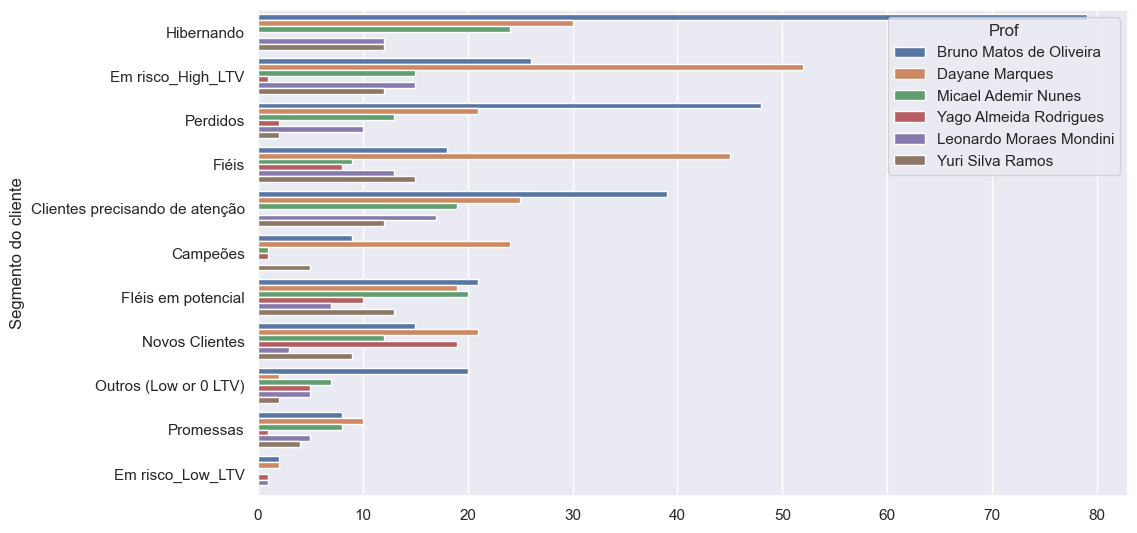

In [80]:

fig, axs = plt.subplots(figsize=(10,6))

df4 = pd.DataFrame(df.groupby(by=['Segmento do cliente', 'Prof'])['Cliente'].count()).sort_values(by='Cliente', ascending=False)

sns.barplot(x=df4.values.flatten(),
           y=df4.index.get_level_values('Segmento do cliente'),
           hue=df4.index.get_level_values('Prof'),
           orient="h")

<AxesSubplot: ylabel='GRUPO_PLAN_OKR'>

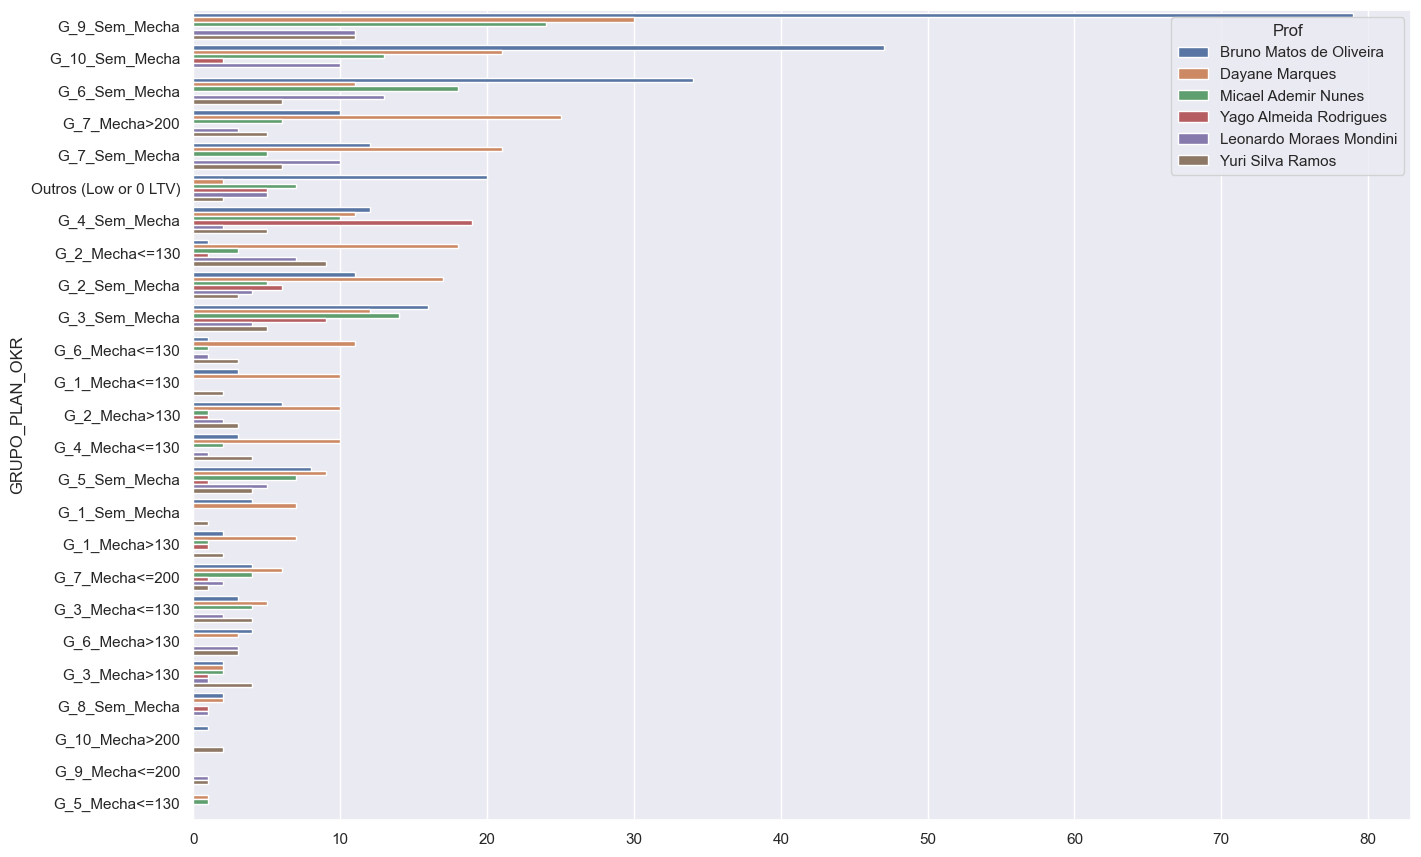

In [81]:
fig, axs = plt.subplots(figsize=(14,10))

df4 = pd.DataFrame(df.groupby(by=['GRUPO_PLAN_OKR', 'Prof'])['Cliente'].count()).sort_values(by='Cliente', ascending=False)

sns.barplot(x=df4.values.flatten(),
           y=df4.index.get_level_values('GRUPO_PLAN_OKR'),
           hue=df4.index.get_level_values('Prof'),
           orient="h")

In [60]:
df4 = pd.DataFrame(df.groupby(by=['Segmento do cliente', 'Prof'])['Cliente'].count()).sort_values(by='Cliente', ascending=False)
df_out = df4[df4.index.get_level_values('Prof') == df.Prof.unique()[0]]

#ax = sns.barplot(x = df_out.values.flatten(), y = df_out.index, orient="h", color ='maroon', width = 0.4)



df_out


,Cliente
Segmento do cliente,
Em risco_High_LTV,52
Fiéis,45
Hibernando,30
Clientes precisando de atenção,25
Campeões,24
Perdidos,21
Novos Clientes,21
FIéis em potencial,19
Promessas,10


In [ ]:
df4 = pd.DataFrame(df.groupby(by=['Segmento do cliente', 'Prof'])['Cliente'].count()).sort_values(by='Cliente', ascending=False)
df4

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = df4.values.flatten(), y = df4.index, orient="h", color ='maroon', width = 0.4)
#ax.set_title(f'Curva (Last Price)')